In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from glob import glob
from scipy.misc import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
vehicles_paths = []
non_vehicles_paths = []

vehicle_dir = 'data/vehicles/'
non_vehicle_dir = 'data/non-vehicles/'
pattern   = "*.png"

for dir,_,_ in os.walk(vehicle_dir):
    vehicles_paths.extend(glob(os.path.join(dir,pattern))) 
    
for dir,_,_ in os.walk(non_vehicle_dir):
    non_vehicles_paths.extend(glob(os.path.join(dir,pattern))) 
    
print('Vehicle images found: ', len(vehicles_paths))
print('"Non Vehicle" images found: ', len(non_vehicles_paths))

Vehicle images found:  8792
"Non Vehicle" images found:  9497


In [3]:
IMG_SHAPE = (64,64,3)
def load_images(paths):
    images = np.zeros((len(paths), *IMG_SHAPE), dtype=np.uint8)
    for i, path in enumerate(paths):
        images[i] = imread(path)
        
    return images

In [4]:
vehicles = load_images(vehicles_paths)
non_vehicles = load_images(non_vehicles_paths)

In [5]:
def append_h_flipped(images):
    flipped = np.copy(images)[:, :, ::-1, :]
    return np.concatenate((images, flipped), axis=0)

In [6]:
vehicles = append_h_flipped(vehicles)
non_vehicles = append_h_flipped(non_vehicles)

In [7]:
print('Vehicle size: ', len(vehicles))
print('"Non Vehicle" size: ', len(non_vehicles))

Vehicle size:  17584
"Non Vehicle" size:  18994


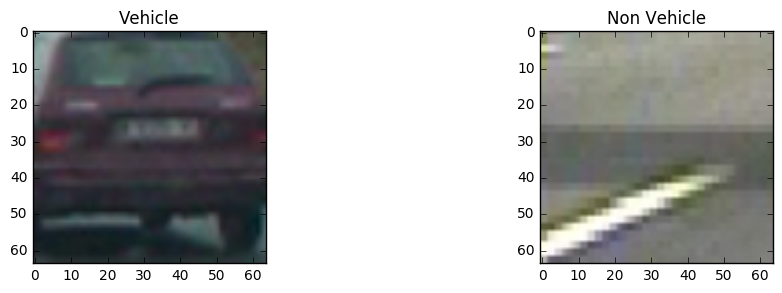

In [8]:
fig, axis= plt.subplots(1, 2, figsize=(12,3))
_ = axis[0].imshow(vehicles[0])
_ = axis[0].set_title('Vehicle')
_ = axis[1].imshow(non_vehicles[1])
_ = axis[1].set_title('Non Vehicle')

In [9]:
labels = np.concatenate((np.ones(vehicles.shape[0], dtype=np.uint8),
                         np.zeros(non_vehicles.shape[0], dtype=np.uint8)))

features = np.concatenate((vehicles, non_vehicles))

In [10]:
features_shuff, labels_shuff= shuffle(features, labels, random_state=7)

X_train, X_test, y_train, y_test = train_test_split(
    features_shuff, labels_shuff, test_size=0.25, random_state=7, stratify=labels)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=7, stratify=y_train)

print('X_train size: ', X_train.shape[0])
print('X_val size: ', X_val.shape[0])
print('X_test size: ', X_test.shape[0])

X_train size:  20574
X_val size:  6859
X_test size:  9145


In [42]:
data = {'train': (X_train, y_train),
        'val': (X_val, y_val),
        'test': (X_test, y_test)}

In [43]:
with open('data/data.p', 'wb') as f:
    pickle.dump(data, f)